In [1]:
from random import shuffle

from numpy import ndarray
from pandas import DataFrame
import tensorflow as tf

from neuralzoo.visualization.image_loader import load_image, dataframe_per_labels




In [2]:
# NOTE legacy import from local pickles
# dataframe_train, target_train, dataframe_test, target_test = dataframes_from_cifar()
# target_train.head()
data = tf.keras.datasets.cifar10.load_data()

In [3]:
(dataframe_train, target_train), (dataframe_test, target_test) = data 

Image 0 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 1 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 2 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 3 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 4 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 5 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 6 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 7 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 8 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 9 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)


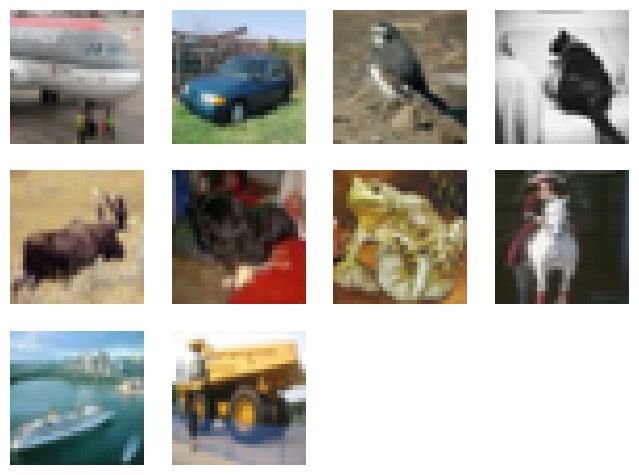

In [4]:
def get_random_image_per_class(dataframe: ndarray, target: ndarray) -> list:
    values = []
    potential_values = list(set(target.flatten()))  
    for value in potential_values:
        images_in_class = [dataframe[index] for index in range(len(target)) if target[index] == value]
        if images_in_class:
            shuffle(images_in_class)
            values.append(images_in_class[0])  
    
    return values

images = get_random_image_per_class(dataframe_train, target_train)
load_image(images)


In [5]:
full_dataframe_train = DataFrame(data = {'image':[element for element in dataframe_train], 'label':[element[0] for element in target_train]})
full_dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   50000 non-null  object
 1   label   50000 non-null  uint8 
dtypes: object(1), uint8(1)
memory usage: 439.6+ KB


In [7]:
full_dataframe_train['label'].value_counts()

label
6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
Name: count, dtype: int64

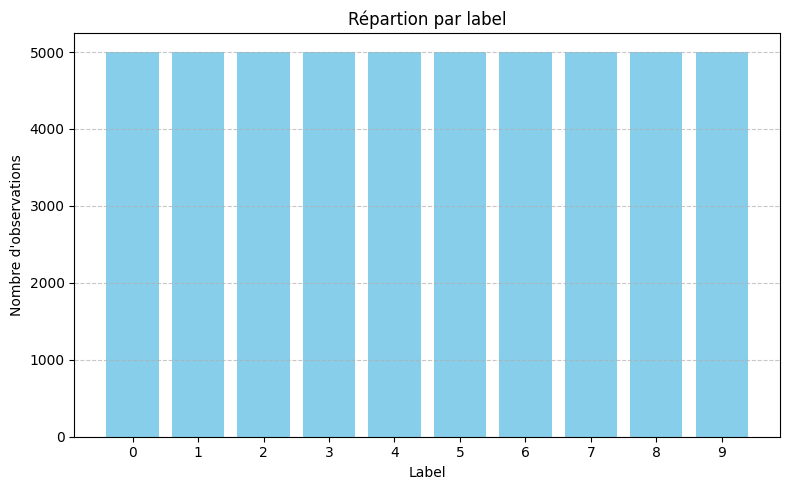

In [6]:
dataframe_per_labels(full_dataframe_train)

In [15]:
UNWANTED_LABELS = [0,1,8,9]
full_dataframe_train.drop(full_dataframe_train[full_dataframe_train['label'].isin(UNWANTED_LABELS)].index, inplace=True)
full_dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 49996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   30000 non-null  object
 1   label   30000 non-null  uint8 
dtypes: object(1), uint8(1)
memory usage: 498.0+ KB
